Case Study 1 (Safe Driver Prediction)

 car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

    1. id	
    2.  target	
    ps_ind_01	ps_ind_02_cat	ps_ind_03	ps_ind_04_cat	ps_ind_05_cat	ps_ind_06_bin	ps_ind_07_bin	ps_ind_08_bin	ps_ind_09_bin	ps_ind_10_bin	ps_ind_11_bin	ps_ind_12_bin	ps_ind_13_bin	ps_ind_14	ps_ind_15	ps_ind_16_bin	ps_ind_17_bin	ps_ind_18_bin	ps_reg_01	ps_reg_02	ps_reg_03	ps_car_01_cat	ps_car_02_cat	ps_car_03_cat	ps_car_04_cat	ps_car_05_cat	ps_car_06_cat	ps_car_07_cat	ps_car_08_cat	ps_car_09_cat	ps_car_10_cat	ps_car_11_cat	ps_car_11	ps_car_12	ps_car_13	ps_car_14	ps_car_15	ps_calc_01	ps_calc_02	ps_calc_03	ps_calc_04	ps_calc_05	ps_calc_06	ps_calc_07	ps_calc_08	ps_calc_09	ps_calc_10	ps_calc_11	ps_calc_12	ps_calc_13	ps_calc_14	ps_calc_15_bin	ps_calc_16_bin	ps_calc_17_bin	ps_calc_18_bin	ps_calc_19_bin	ps_calc_20_bin

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df_train = pd.read_csv('train.csv')
df_train.head()


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


0    2403
1      96
Name: target, dtype: int64

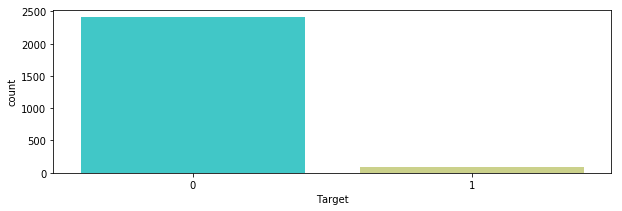

In [23]:
plt.figure(figsize=(10,3))
sns.countplot(df_train['target'],palette='rainbow')
plt.xlabel('Target')

df_train['target'].value_counts()

The 'target' variable in imbalanced. The target column in data set is whether or not claim was filed for that policy holder. The target variable is quite unbalanced, with only %4 of policyholders in training data filing claim within the year.

In [24]:
ps_cal = df_train.columns[df_train.columns.str.startswith('ps_calc')] 
df_train = df_train.drop(ps_cal,axis =1)

In [25]:
df_train.shape

(2499, 39)

Missing value is data set

In [26]:
df_train.isnull().sum()

id               0
target           0
ps_ind_01        0
ps_ind_02_cat    0
ps_ind_03        0
ps_ind_04_cat    0
ps_ind_05_cat    0
ps_ind_06_bin    0
ps_ind_07_bin    0
ps_ind_08_bin    0
ps_ind_09_bin    0
ps_ind_10_bin    0
ps_ind_11_bin    0
ps_ind_12_bin    0
ps_ind_13_bin    0
ps_ind_14        0
ps_ind_15        0
ps_ind_16_bin    0
ps_ind_17_bin    0
ps_ind_18_bin    0
ps_reg_01        0
ps_reg_02        0
ps_reg_03        0
ps_car_01_cat    0
ps_car_02_cat    0
ps_car_03_cat    0
ps_car_04_cat    0
ps_car_05_cat    0
ps_car_06_cat    0
ps_car_07_cat    0
ps_car_08_cat    0
ps_car_09_cat    0
ps_car_10_cat    0
ps_car_11_cat    0
ps_car_11        0
ps_car_12        0
ps_car_13        0
ps_car_14        0
ps_car_15        0
dtype: int64

In [27]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df_train)

,Missing value,N unique value,dtype
id,0,2499,int64
target,0,2,int64
ps_ind_01,0,8,int64
ps_ind_02_cat,0,5,int64
ps_ind_03,0,12,int64
ps_ind_04_cat,0,3,int64
ps_ind_05_cat,0,8,int64
ps_ind_06_bin,0,2,int64
ps_ind_07_bin,0,2,int64
ps_ind_08_bin,0,2,int64


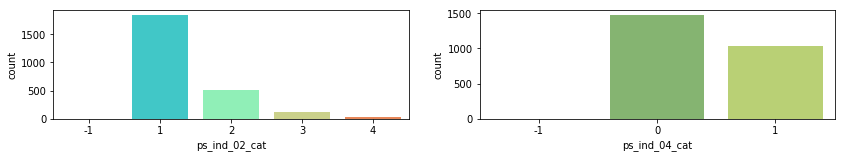

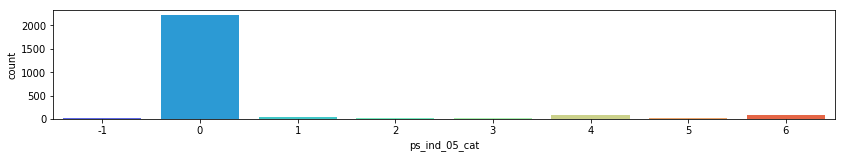

In [28]:
fig ,ax = plt.subplots(1,2,figsize=(14,2))
ax1,ax2, = ax.flatten()
sns.countplot(df_train['ps_ind_02_cat'],palette='rainbow',ax=ax1)
sns.countplot(df_train['ps_ind_04_cat'],palette='summer',ax=ax2)
fig,ax = plt.subplots(figsize=(14,2))
sns.countplot(df_train['ps_ind_05_cat'],palette='rainbow',ax=ax)

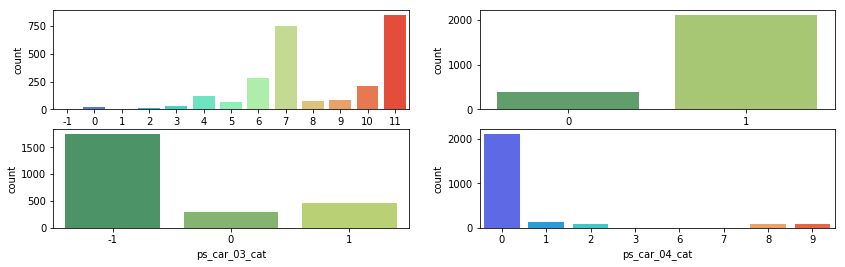

In [29]:
fig,ax = plt.subplots(2,2,figsize=(14,4))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df_train['ps_car_01_cat'],palette='rainbow',ax=ax1)
sns.countplot(df_train['ps_car_02_cat'],palette='summer',ax=ax2)
sns.countplot(df_train['ps_car_03_cat'],palette='summer',ax=ax3)
sns.countplot(df_train['ps_car_04_cat'],palette='rainbow',ax=ax4)

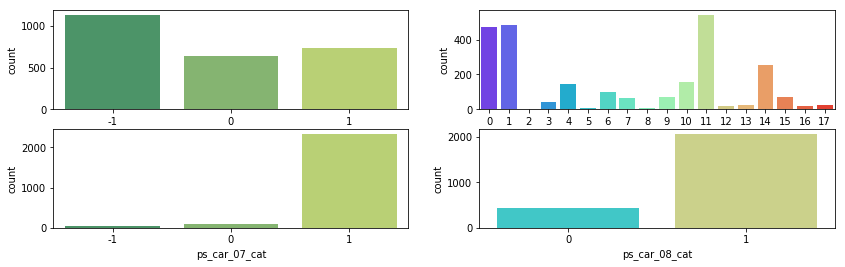

In [30]:
fig,ax = plt.subplots(2,2,figsize = (14,4))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df_train['ps_car_05_cat'],palette='summer',ax=ax1)
sns.countplot(df_train['ps_car_06_cat'],palette='rainbow',ax=ax2)
sns.countplot(df_train['ps_car_07_cat'],palette='summer',ax=ax3)
sns.countplot(df_train['ps_car_08_cat'],palette='rainbow',ax=ax4)

List of categorical 

In [31]:
tot_cat_col = list(df_train.select_dtypes(include=['category']).columns)

other_cat_col = [c for c in tot_cat_col if c not in cat_col+ bin_col]
other_cat_col

[]

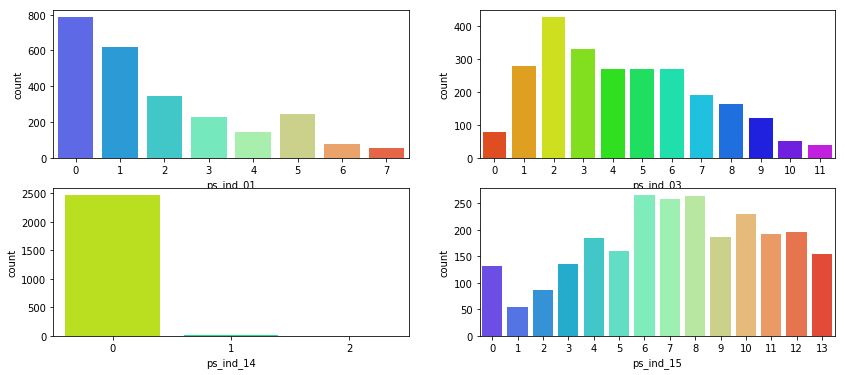

In [32]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=df_train,x='ps_ind_01',palette='rainbow',ax=ax1)
sns.countplot(data=df_train,x='ps_ind_03',palette='gist_rainbow',ax=ax2)
sns.countplot(data=df_train,x='ps_ind_14',palette='gist_rainbow',ax=ax3)
sns.countplot(data=df_train,x='ps_ind_15',palette='rainbow',ax=ax4)

In [33]:
num_col = [c for c in df_train.columns if c not in tot_cat_col]
num_col.remove('id')
num_col

['target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15']

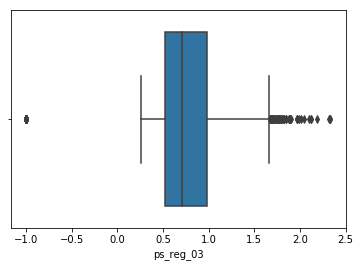

In [34]:
sns.boxplot('ps_reg_03',data=df_train)

In [35]:
def descrictive_stat_feat(df):
    df = pd.DataFrame(df)
    dcol= [c for c in df_train.columns if df_train[c].nunique()>=10]
    dcol.remove('id')   
    d_median = df[dcol].median(axis=0)
    d_mean = df[dcol].mean(axis=0)
    q1 = df[dcol].apply(np.float32).quantile(0.25)
    q3 = df[dcol].apply(np.float32).quantile(0.75)
    
    #Add mean and median column to data set having more then 10 categories
    for c in dcol:
        df[c+str('_median_range')] = (df[c].astype(np.float32).values > d_median[c]).astype(np.int8)
        df[c+str('_mean_range')] = (df[c].astype(np.float32).values > d_mean[c]).astype(np.int8)
        df[c+str('_q1')] = (df[c].astype(np.float32).values < q1[c]).astype(np.int8)
        df[c+str('_q3')] = (df[c].astype(np.float32).values > q3[c]).astype(np.int8)
    return df

In [38]:
df_train1 = descrictive_stat_feat(df_train)

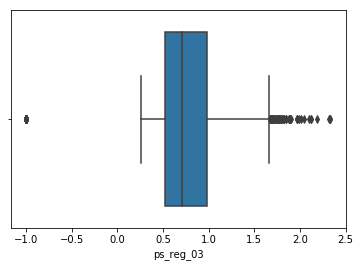

In [39]:

sns.boxplot('ps_reg_03',data=df_train1)
